## Feature Engineering: Feature Creation

### Read in text

In [1]:
import pandas as pd

data = pd.read_csv('data/SMSSpamCollection.tsv', sep='\t', header=None)
data.columns = ['label', 'body_text']

data.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


### Create feature for text message length

In [2]:
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data.head()

,label,body_text,body_len
0,ham,I've been searching for the right words to tha...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",49
3,ham,Even my brother is not like to speak with me. ...,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


### Create feature for % of text that is punctuation

In [6]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

In [8]:
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head()

,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


### Create feature UpperCase Char Count

In [21]:
def count_upper(text):
    count = sum([1 for char in text if char.isupper()])
    return round(count/(len(text) - text.count(" ")), 3)*100

In [22]:
data['upper%'] = data['body_text'].apply(lambda x: count_upper(x))

data.head()

,label,body_text,body_len,punct%,upper%
0,ham,I've been searching for the right words to tha...,160,2.5,1.9
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7,7.8
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1,92.9


### Evaluate created features

In [9]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

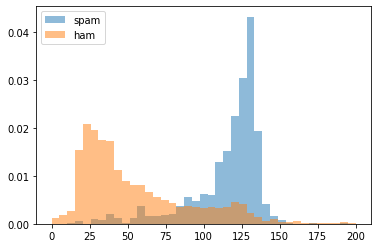

In [13]:
bins = np.linspace(0, 200, 40)
plt.hist(data[data['label'] == 'spam']['body_len'], bins, alpha=0.5, density=True, label='spam')
plt.hist(data[data['label'] == 'ham']['body_len'], bins, alpha=0.5, density=True, label='ham')
plt.legend(loc='upper left');

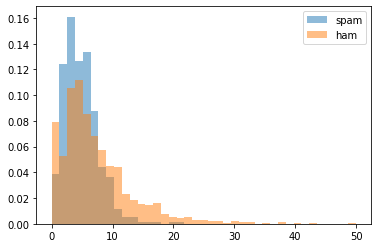

In [15]:
bins = np.linspace(0, 50, 40)
plt.hist(data[data['label'] == 'spam']['punct%'], bins, alpha=0.5, density=True, label='spam')
plt.hist(data[data['label'] == 'ham']['punct%'], bins, alpha=0.5, density=True, label='ham')
plt.legend(loc='upper right');

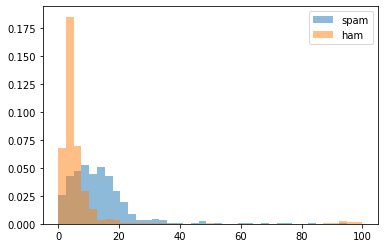

In [25]:
bins = np.linspace(0, 100, 40)
plt.hist(data[data['label'] == 'spam']['upper%'], bins, alpha=0.5, density=True, label='spam')
plt.hist(data[data['label'] == 'ham']['upper%'], bins, alpha=0.5, density=True, label='ham')
plt.legend(loc='upper right');